In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [276]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [277]:
df.shape

(5572, 5)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [279]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [280]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [281]:
df.duplicated().sum()

np.int64(403)

In [282]:
df.drop_duplicates(inplace=True)

In [283]:
# apply label encoding on target columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target']) # here Ham -> 0, Spam -> 1

In [284]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA

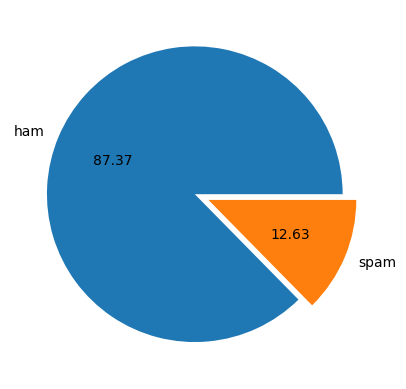

In [285]:
#EDA
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", explode=[0, 0.1])
plt.show()

In [286]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [287]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# analyze the text column
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [288]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


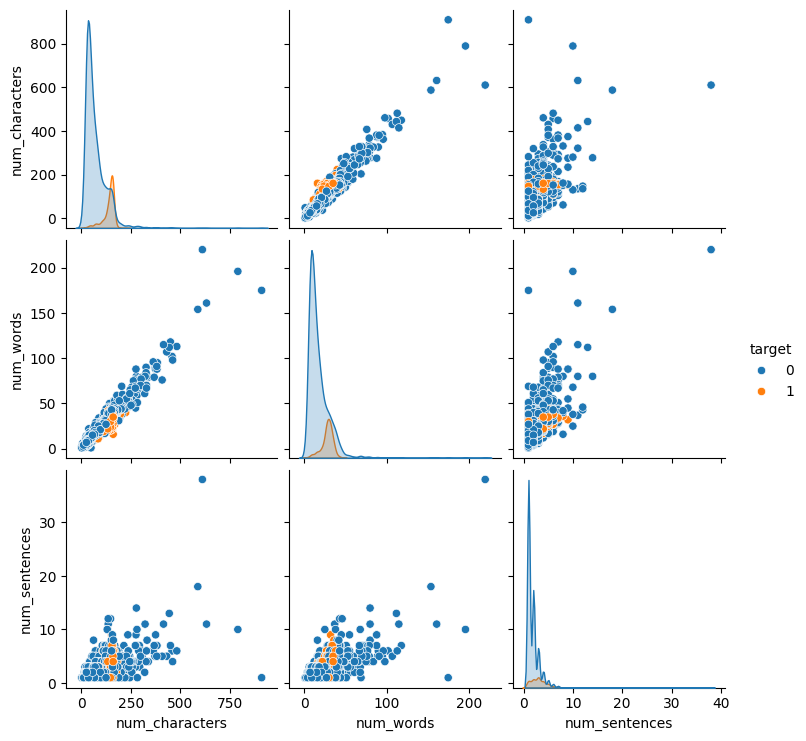

In [289]:
sns.pairplot(df, hue='target')

In [290]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [291]:
# describe on ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [292]:
# Describe in spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


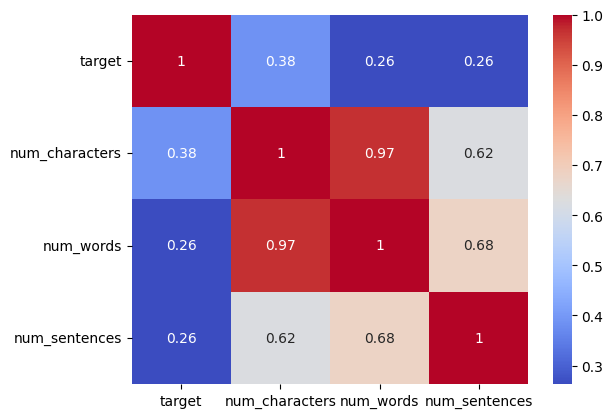

In [293]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='num_words', ylabel='Count'>

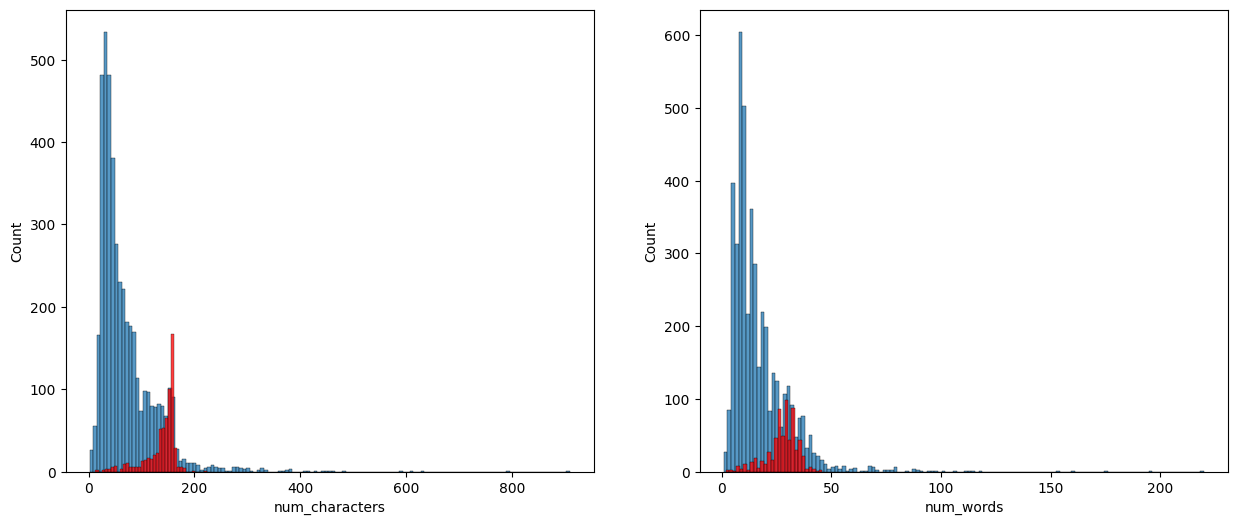

In [294]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

plt.subplot(1, 2, 2)
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')


In [295]:
import string

# import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [296]:
# Data preprocessing

def text_preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [297]:
text_preprocessing('i love the YT lectures on machine learning. How about you?')

'love yt lectur machin learn'

In [298]:
df['transformer_text'] = df['text'].apply(lambda x: text_preprocessing(x))

In [299]:
df

,target,text,num_characters,num_words,num_sentences,transformer_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [300]:
# now i wanted to know, which all the keywords highlets more in both spam and ham

#import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [301]:
Ham_keywords = wc.generate(df[df['target'] == 0]['transformer_text'].str.cat(sep=" "))
Spam_keywords = wc.generate(df[df['target'] == 1]['transformer_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam Keywords')

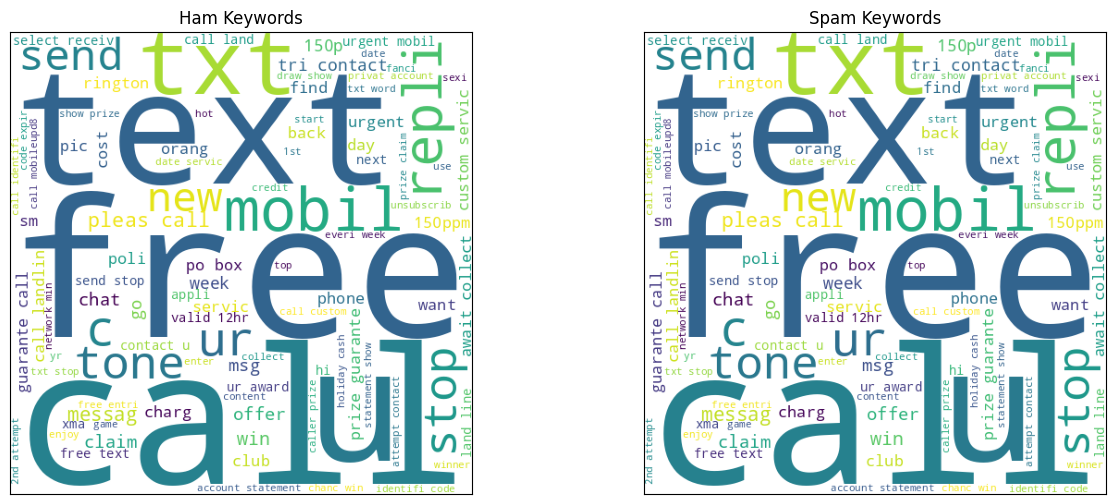

In [302]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(Ham_keywords)
plt.xticks([])
plt.yticks([])
plt.title('Ham Keywords')

plt.subplot(1, 2, 2)
plt.imshow(Spam_keywords)
plt.xticks([])
plt.yticks([])
plt.title('Spam Keywords')

In [303]:
def top_30_keywords(df, number):
  dicts = {}
  for i in df[df['target'] == number]['transformer_text'].to_list():
    for word in i.split():
      if word in dicts:
        dicts[word] += 1
      else:
        dicts[word] = 1

  newlist = sorted(dicts.items(), key=lambda x: x[1], reverse=True)
  res = [i[0] for i in newlist[:30]]
  return res, newlist[:10]

In [304]:
ham_top_keywords, newlistham = top_30_keywords(df, 0)

In [305]:
print("Top 30 keywords for not spam: ")
ham_top_keywords

Top 30 keywords for not spam: 


['u',
 'go',
 'get',
 'gt',
 'lt',
 '2',
 'come',
 'got',
 'know',
 'like',
 'call',
 'time',
 'ok',
 'love',
 'good',
 'want',
 'ur',
 'day',
 'need',
 'one',
 'lor',
 '4',
 'home',
 'think',
 'see',
 'take',
 'still',
 'da',
 'tell',
 'make']

In [306]:
spam_top_keywords, newlistspam = top_30_keywords(df, 1)

In [307]:
print("Top 30 keywords for not spam: ")
ham_top_keywords

Top 30 keywords for not spam: 


['u',
 'go',
 'get',
 'gt',
 'lt',
 '2',
 'come',
 'got',
 'know',
 'like',
 'call',
 'time',
 'ok',
 'love',
 'good',
 'want',
 'ur',
 'day',
 'need',
 'one',
 'lor',
 '4',
 'home',
 'think',
 'see',
 'take',
 'still',
 'da',
 'tell',
 'make']

Text(0.5, 1.0, 'Ham Keywords')

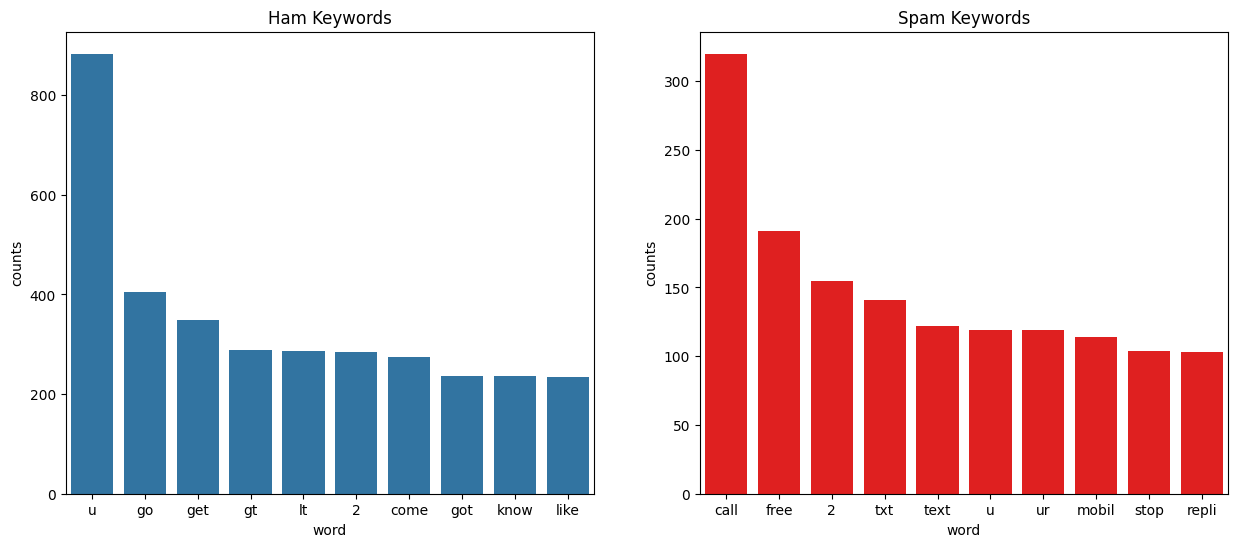

In [308]:

def top_10_keywords_barplot(newlist):
  word = []
  counts = []

  for i in newlist:
    word.append(i[0])
    counts.append(i[1])

  data = {'word': word, 'counts': counts}
  dfdata  = pd.DataFrame(data)
  return dfdata

spamkeys = top_10_keywords_barplot(newlistspam)
hamkeys = top_10_keywords_barplot(newlistham)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 2)
sns.barplot(x='word', y='counts', data=spamkeys, color='red')
plt.title('Spam Keywords')

plt.subplot(1, 2, 1)
sns.barplot(x='word', y='counts', data=hamkeys)
plt.title('Ham Keywords')

## Model Building


In [309]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
Tfid = TfidfVectorizer(max_features=3000)

In [310]:
# x = cv.fit_transform(df['transformer_text']).toarray()
x = Tfid.fit_transform(df['transformer_text']).toarray()

In [311]:
y = df['target'].values

In [312]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [313]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [314]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()


In [315]:
# Multinominal model
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)

In [316]:
y_pred_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [317]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_mnb))
print("precission_score: ", precision_score(y_test, y_pred_mnb))
print("confusion matrix: ", confusion_matrix(y_test, y_pred_mnb))

Accuracy score:  0.9709864603481625
precission_score:  1.0
confusion matrix:  [[896   0]
 [ 30 108]]


In [318]:
# BernoulliNB
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)

In [319]:
y_pred_bnb

array([0, 0, 0, ..., 0, 0, 0])

In [320]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_bnb))
print("precission_score: ", precision_score(y_test, y_pred_bnb))
print("confusion matrix: ", confusion_matrix(y_test, y_pred_bnb))

Accuracy score:  0.9835589941972921
precission_score:  0.991869918699187
confusion matrix:  [[895   1]
 [ 16 122]]


In [321]:
# GuassianNB Model
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

In [322]:
y_pred_gnb

array([0, 1, 1, ..., 0, 0, 0])

In [323]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_gnb))
print("precission_score: ", precision_score(y_test, y_pred_gnb))
print("confusion matrix: ", confusion_matrix(y_test, y_pred_gnb))

Accuracy score:  0.874274661508704
precission_score:  0.5181818181818182
confusion matrix:  [[790 106]
 [ 24 114]]


# Conclusion for model selection

In this work, I experimented with Naive Bayes classifiers (MultinomialNB, GaussianNB, BernoulliNB) using both CountVectorizer and TfidfVectorizer for feature extraction. The results showed that TfidfVectorizer outperformed CountVectorizer, as it gave better representation of the input text. Among the classifiers, MultinomialNB achieved the highest precision, making it the most suitable model for this dataset. This demonstrates that choosing the right feature extraction technique and classifier combination is crucial for achieving optimal performance in text classification tasks

In [324]:
# model pickling
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(Tfid, open('vectorizer.pkl', 'wb'))